<a href="https://colab.research.google.com/github/mlokendra/Tvarit_Assigment/blob/main/Tvarit_Assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pycaret

  Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
river 0.22.0 requires pandas<3.0.0,>=2.2.3, but you have pandas 2.1.4 which is incompatible.
river 0.22.0 requires scipy<2.0.0,>=1.14.1, but you have scipy 1.11.4 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
cuml-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.58.1 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.
plotn

In [1]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.regression import *


In [6]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
elabs_path = '/content/drive/MyDrive/Tvarit_data'  # Change this if your folder is in a different path
files = os.listdir(elabs_path)

In [3]:
file_path = os.path.join(elabs_path, 'DataSet_Assignment09.xlsx')
df=pd.read_excel(file_path)
df

,Timestamp,OxEnRa,BlFuPeIn,EnOxFl,CoBlFl,BlMo,BlFuBoGaVo,BlFuBoGaIn,ThCoTe,ToGaPr,...,CoBlTe,HoBlTe,ToTe,BlHu,CoInSeVa,FoSI,HoBl,ToGasP,CoBF,SI
0,2021-05-12 17:56:25,3.691772,17.661523,16941.904350,36.472670,146.285825,7925.957227,81.975757,2210.712256,224.366480,...,212.936183,1087.730999,NaN,13.118669,45.994059,0.481272,1075.254532,221.600735,36.796521,0.479000
1,2021-05-12 17:56:25,3.744628,0.193811,17554.954071,34.087434,161.762571,8049.518860,81.637472,2268.780322,0.005692,...,NaN,2.082851,1.795880,10.353929,1.580861,0.337968,2.110829,0.005584,34.238289,0.312456
2,2021-05-12 18:01:25,3.702922,17.531952,16983.415800,35.526652,NaN,7927.604542,81.534685,2212.091683,224.253433,...,213.641190,1092.204113,155.791347,13.597754,45.995841,0.480590,1086.126125,220.795548,35.678927,0.485000
3,2021-05-12 18:38:31,3.704258,17.787358,16990.589240,34.882208,147.002954,7932.062270,81.259530,2206.561905,224.181494,...,213.790424,1088.005197,158.113898,13.950920,45.997089,0.481913,1102.376863,228.013179,34.680944,0.429000
4,2021-05-12 18:49:02,3.710455,17.845446,17028.062470,34.445766,150.394003,7938.962944,81.105510,2217.517527,224.086884,...,213.517490,1101.989445,161.883438,14.185215,45.997962,NaN,1101.785918,225.502798,34.206146,0.430000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,2021-08-06 20:45:01,3.406438,17.425005,15807.419490,56.809648,156.799063,7999.878155,81.200283,2186.117116,222.843031,...,218.218070,1071.694497,192.137107,15.180339,44.364392,0.461115,1076.618877,223.699067,57.515880,0.430000
5700,2021-08-06 21:07:51,3.415180,17.509546,15856.899530,33.910779,157.159344,8003.130885,NaN,NaN,222.924974,...,217.760443,1073.488648,183.753989,15.116244,44.255074,NaN,1082.358218,219.707450,33.514577,0.452000
5701,2021-08-06 21:34:51,3.428042,17.490938,15907.438930,33.887562,159.550430,7999.750879,81.198794,2203.712017,222.963593,...,217.934532,1089.790757,175.094459,15.054390,44.341515,0.451847,1100.259571,221.548562,34.160979,0.381000
5702,2021-08-06 21:52:01,3.445839,17.853223,15911.405310,33.716979,156.801806,7965.404256,80.850166,2193.773169,223.588205,...,217.478542,1080.697414,172.470393,14.987713,44.539060,0.430593,1080.784064,222.005766,34.351341,0.401000


In [41]:
df_clean=df.dropna(subset="SI")

In [42]:
df_clean = df_clean.sort_values(by='Timestamp')

In [43]:
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])  # ensure datetime format
#df_clean.set_index('Timestamp', inplace=True)

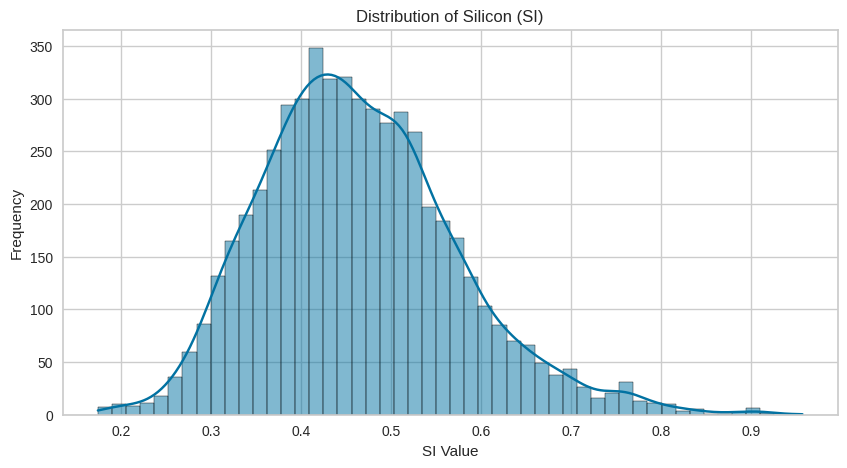

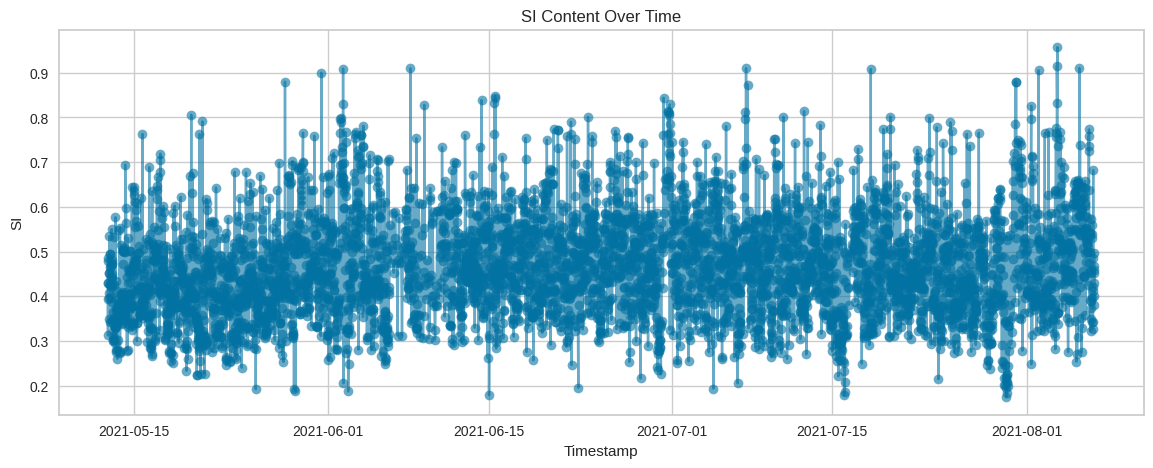

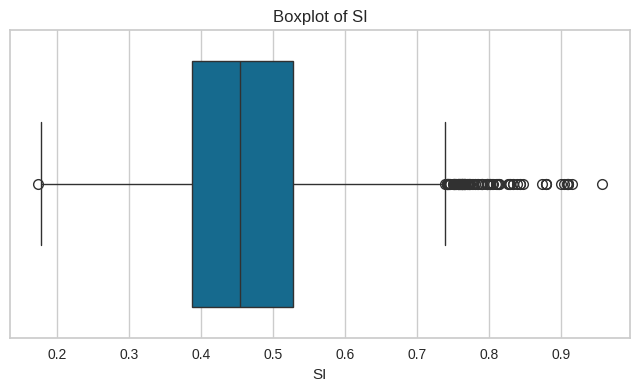

In [7]:
# Ensure datetime parsing
# Sort by time
df_clean = df_clean.sort_values('Timestamp')

# SI distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['SI'], kde=True, bins=50)
plt.title("Distribution of Silicon (SI)")
plt.xlabel("SI Value")
plt.ylabel("Frequency")
plt.show()

# SI over time
plt.figure(figsize=(14, 5))
plt.plot(df_clean['Timestamp'], df_clean['SI'], marker='o', linestyle='-', alpha=0.6)
plt.title("SI Content Over Time")
plt.xlabel("Timestamp")
plt.ylabel("SI")
plt.grid(True)
plt.show()

# Boxplot for outlier detection
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_clean['SI'])
plt.title("Boxplot of SI")
plt.show()

In [8]:
from scipy.stats import skew

print("SI Skewness:", skew(df_clean['SI']))

SI Skewness: 0.5868570712909722


1 Feature engenering
\

In [44]:
# df_clean['lag_1'] = df_clean['SI'].shift(1)
# df_clean['lag_2'] = df_clean['SI'].shift(2)
# df_clean['lag_3'] = df_clean['SI'].shift(3)
# df_clean['lag_4'] = df_clean['SI'].shift(4)
# df_clean['lag_5'] = df_clean['SI'].shift(5)

In [45]:
lag_features = ['HoBlTe',"CoBlTe", 'ToGaPr', 'EnOxPr', 'EnOxFl']
for feature in lag_features:
    df_clean[f'{feature}_roll3_mean'] = df_clean[feature].rolling(window=3).mean()
    df_clean[f'{feature}_roll3_std'] = df_clean[feature].rolling(window=3).std()


In [46]:
df_clean['blast_to_pressure'] = df_clean['HoBlTe'] / (df_clean['ToGaPr'] + 1e-5)
df_clean['blast_oxy_interaction'] = df_clean['HoBlTe'] * df_clean['EnOxFl']
df_clean["blast_diff"]=df_clean['HoBlTe'] - df_clean['CoBlTe']

In [47]:
df_clean.columns

Index(['Timestamp', 'OxEnRa', 'BlFuPeIn', 'EnOxFl', 'CoBlFl', 'BlMo',
       'BlFuBoGaVo', 'BlFuBoGaIn', 'ThCoTe', 'ToGaPr', 'EnOxPr', 'CoBlPr',
       'ToPrDr', 'HoBlPr', 'AcBlVe', 'CoBlTe', 'HoBlTe', 'ToTe', 'BlHu',
       'CoInSeVa', 'FoSI', 'HoBl', 'ToGasP', 'CoBF', 'SI', 'HoBlTe_roll3_mean',
       'HoBlTe_roll3_std', 'CoBlTe_roll3_mean', 'CoBlTe_roll3_std',
       'ToGaPr_roll3_mean', 'ToGaPr_roll3_std', 'EnOxPr_roll3_mean',
       'EnOxPr_roll3_std', 'EnOxFl_roll3_mean', 'EnOxFl_roll3_std',
       'blast_to_pressure', 'blast_oxy_interaction', 'blast_diff'],
      dtype='object')

In [48]:
target = 'SI'
features = [col for col in df_clean.columns if col not in ['Timestamp', target]]
#df_clean[features] = df_clean[features].fillna(df_clean[features].rolling(window=3, min_periods=1).mean())
df_clean.dropna(inplace=True)
X = df_clean[[ 'OxEnRa', 'EnOxFl', 'CoBlFl', 'BlMo', 'BlFuBoGaIn', 'ThCoTe', 'EnOxPr', 'CoBlPr', 'ToPrDr', 'HoBlPr', 'AcBlVe', 'CoBlTe', 'HoBlTe', 'ToTe', 'BlHu', 'CoInSeVa', 'FoSI', 'HoBl', 'ToGasP', 'CoBF', 'HoBlTe_roll3_mean', 'HoBlTe_roll3_std', 'CoBlTe_roll3_mean', 'CoBlTe_roll3_std', 'ToGaPr_roll3_mean', 'ToGaPr_roll3_std', 'EnOxPr_roll3_mean', 'EnOxPr_roll3_std', 'EnOxFl_roll3_mean', 'EnOxFl_roll3_std']
]
y = df_clean[target]
df_preproceed=df_clean[[ 'OxEnRa', 'EnOxFl', 'CoBlFl', 'BlMo', 'BlFuBoGaIn', 'ThCoTe', 'EnOxPr', 'CoBlPr', 'ToPrDr', 'HoBlPr', 'AcBlVe', 'CoBlTe', 'HoBlTe', 'ToTe', 'BlHu', 'CoInSeVa', 'FoSI', 'HoBl', 'ToGasP', 'CoBF', 'HoBlTe_roll3_mean', 'HoBlTe_roll3_std', 'CoBlTe_roll3_mean', 'CoBlTe_roll3_std', 'ToGaPr_roll3_mean', 'ToGaPr_roll3_std', 'EnOxPr_roll3_mean', 'EnOxPr_roll3_std', 'EnOxFl_roll3_mean', 'EnOxFl_roll3_std',"SI"]
]
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


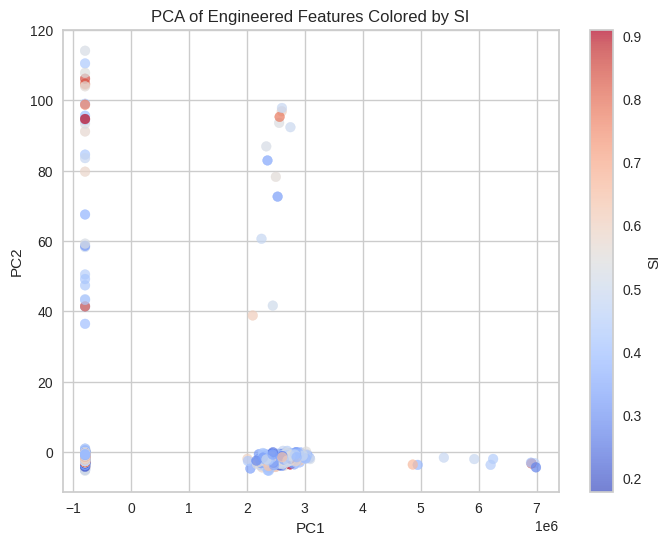

In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title("PCA of Engineered Features Colored by SI")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='SI')
plt.show()

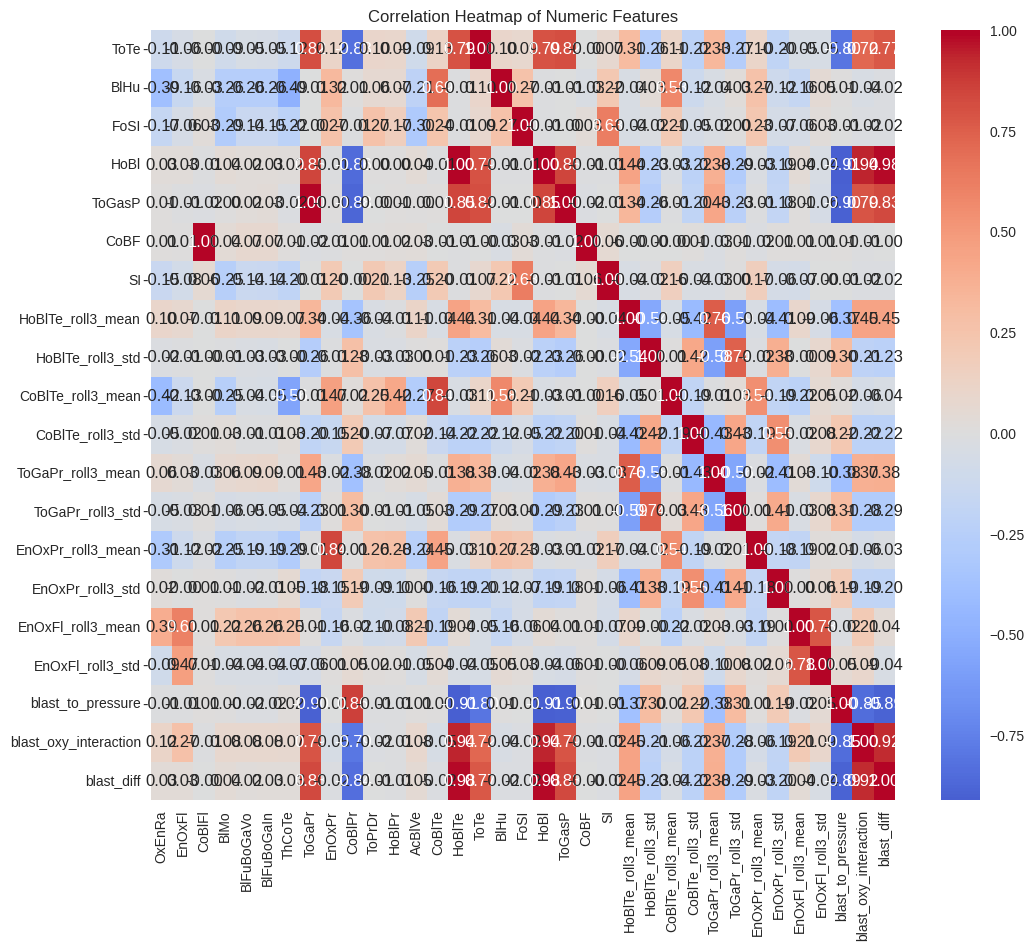

In [33]:
numeric_df = df_clean.select_dtypes(include=['float64', 'int64']).dropna().drop(columns=["BlFuPeIn","CoInSeVa"])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[15:], annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [34]:
corr_matrix.iloc[:,10:]

,ToPrDr,HoBlPr,AcBlVe,CoBlTe,HoBlTe,ToTe,BlHu,FoSI,HoBl,ToGasP,...,CoBlTe_roll3_std,ToGaPr_roll3_mean,ToGaPr_roll3_std,EnOxPr_roll3_mean,EnOxPr_roll3_std,EnOxFl_roll3_mean,EnOxFl_roll3_std,blast_to_pressure,blast_oxy_interaction,blast_diff
OxEnRa,-0.279949,-0.297148,0.485287,-0.499928,0.028365,-0.112920,-0.385329,-0.167250,0.027838,0.011128,...,-0.047537,0.060009,-0.046298,-0.305355,0.021098,0.388059,-0.094172,-0.011188,0.115527,0.031432
EnOxFl,-0.094410,-0.076271,0.196401,-0.171364,0.029015,-0.055115,-0.156422,-0.056154,0.028415,-0.008212,...,-0.023671,0.033649,-0.030754,-0.115942,-0.002726,0.607617,0.471945,-0.008738,0.274140,0.029896
CoBlFl,0.009711,0.019462,0.029187,-0.006906,-0.011744,-0.002562,-0.033757,0.028190,-0.011801,-0.016515,...,0.010921,-0.030492,0.008461,-0.016511,0.009219,0.008295,0.005562,0.009190,-0.011465,-0.003992
BlMo,-0.295281,-0.146978,0.959571,-0.288990,0.037898,-0.090297,-0.256324,-0.290659,0.037728,0.003847,...,0.027440,0.060722,-0.056153,-0.247944,0.006309,0.220501,-0.044122,0.004341,0.082545,0.042946
BlFuBoGaVo,-0.086950,0.183126,0.545209,-0.059706,0.024648,-0.051014,-0.258921,-0.142942,0.024622,0.024842,...,-0.013140,0.088795,-0.045020,-0.189537,-0.021095,0.256159,-0.041625,-0.015729,0.078191,0.020361
BlFuBoGaIn,-0.083790,0.183403,0.541811,-0.060318,0.029378,-0.052791,-0.260673,-0.145892,0.029381,0.031350,...,-0.008848,0.090972,-0.046796,-0.192719,-0.013881,0.256665,-0.043004,-0.021975,0.081224,0.026627
ThCoTe,-0.134702,-0.265300,0.626067,-0.650438,0.018135,-0.119129,-0.491417,-0.217830,0.017657,-0.021805,...,0.025208,0.011684,-0.040350,-0.286953,0.054114,0.252433,-0.073327,0.018285,0.074258,0.026381
ToGaPr,-0.003446,0.011456,0.000491,0.006800,0.848831,0.820615,-0.005530,-0.004288,0.848676,0.999734,...,-0.200778,0.430505,-0.231634,-0.012525,-0.182438,0.008817,-0.058729,-0.896146,0.787321,0.832361
EnOxPr,0.306782,0.332042,-0.283648,0.525838,-0.014088,0.117811,0.322779,0.266996,-0.014040,-0.000067,...,-0.151907,-0.015606,0.009683,0.835988,-0.147429,-0.162991,0.011909,-0.006776,-0.047688,-0.015441
CoBlPr,-0.001324,-0.001204,-0.002652,0.006763,-0.855610,-0.825830,0.008946,-0.013431,-0.855576,-0.878430,...,0.203748,-0.380825,0.301677,0.006917,0.193850,-0.016209,0.054171,0.860351,-0.793288,-0.838199


In [35]:
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))#.drop(columns=["BlFuPeIn","CoInSeVa"])

# Step 3: Find feature pairs with correlation >= 0.95
high_corr_pairs = upper_triangle.stack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'].abs() >= 0.95]

# Display result
print("Highly Correlated Feature Pairs (>= 0.95):")
print(high_corr_pairs.sort_values(by='Correlation', ascending=False))

Highly Correlated Feature Pairs (>= 0.95):
       Feature1    Feature2  Correlation
228      ToGaPr      ToGasP     0.999734
388      HoBlTe        HoBl     0.999716
84       CoBlFl        CoBF     0.996629
404      HoBlTe  blast_diff     0.980770
474        HoBl  blast_diff     0.980396
130  BlFuBoGaVo  BlFuBoGaIn     0.979114
107        BlMo      AcBlVe     0.959571


In [36]:
from collections import Counter
Counter(high_corr_pairs["Feature1"].to_list()+high_corr_pairs["Feature2"].to_list())

Counter({'CoBlFl': 1,
         'BlMo': 1,
         'BlFuBoGaVo': 1,
         'ToGaPr': 1,
         'HoBlTe': 2,
         'HoBl': 2,
         'CoBF': 1,
         'AcBlVe': 1,
         'BlFuBoGaIn': 1,
         'ToGasP': 1,
         'blast_diff': 2})

In [19]:
reg_setup = setup(
    data=df_clean.dropna().drop(columns=["BlFuPeIn","CoInSeVa"]),#[X.columns[rfecv.support_].tolist()+["SI"]],
    target='SI',          # 🔁 Replace with your actual target
    session_id=42,
    fold_strategy='timeseries',
    fold=5,
    data_split_shuffle=False,             # ❗ Required for timeseries
    fold_shuffle=False,                   # ❗ Required for timeseries
    ignore_features=['Timestamp'],        # 📛 Add any non-useful columns here
    verbose=True,
    index=False,
    #numeric_features=X.columns[rfecv.support_].tolist(),
    #pca=True
    normalize=True
)

# Step 2: Compare all models
best_model = compare_models()

,Description,Value
0,Session id,42
1,Target,SI
2,Target type,Regression
3,Original data shape,"(2024, 36)"
4,Transformed data shape,"(2024, 35)"
5,Transformed train set shape,"(1416, 35)"
6,Transformed test set shape,"(608, 35)"
7,Ignore features,1
8,Numeric features,34
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.0665,0.0076,0.0867,0.3373,0.0581,0.1488,0.0240
br,Bayesian Ridge,0.0677,0.0077,0.0874,0.3268,0.0586,0.1517,0.0260
ridge,Ridge Regression,0.0684,0.0078,0.0880,0.3134,0.0591,0.1535,0.0240
huber,Huber Regressor,0.0682,0.0078,0.0879,0.3132,0.0589,0.1515,0.0600
rf,Random Forest Regressor,0.0697,0.0081,0.0899,0.2883,0.0602,0.1550,2.0440
lr,Linear Regression,0.0695,0.0081,0.0898,0.2809,0.0602,0.1563,1.3480
et,Extra Trees Regressor,0.0700,0.0084,0.0912,0.2679,0.0611,0.1555,0.6260
gbr,Gradient Boosting Regressor,0.0706,0.0084,0.0912,0.2650,0.0612,0.1579,1.0460
ada,AdaBoost Regressor,0.0719,0.0086,0.0927,0.2477,0.0622,0.1629,0.2600
xgboost,Extreme Gradient Boosting,0.0746,0.0092,0.0958,0.1927,0.0643,0.1659,0.6440


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [36]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Optimal number of features: 31
Selected features: ['index', 'OxEnRa', 'EnOxFl', 'CoBlFl', 'BlMo', 'BlFuBoGaIn', 'ThCoTe', 'EnOxPr', 'CoBlPr', 'ToPrDr', 'HoBlPr', 'AcBlVe', 'CoBlTe', 'HoBlTe', 'ToTe', 'BlHu', 'CoInSeVa', 'FoSI', 'HoBl', 'ToGasP', 'CoBF', 'HoBlTe_roll3_mean', 'HoBlTe_roll3_std', 'CoBlTe_roll3_mean', 'CoBlTe_roll3_std', 'ToGaPr_roll3_mean', 'ToGaPr_roll3_std', 'EnOxPr_roll3_mean', 'EnOxPr_roll3_std', 'EnOxFl_roll3_mean', 'EnOxFl_roll3_std']


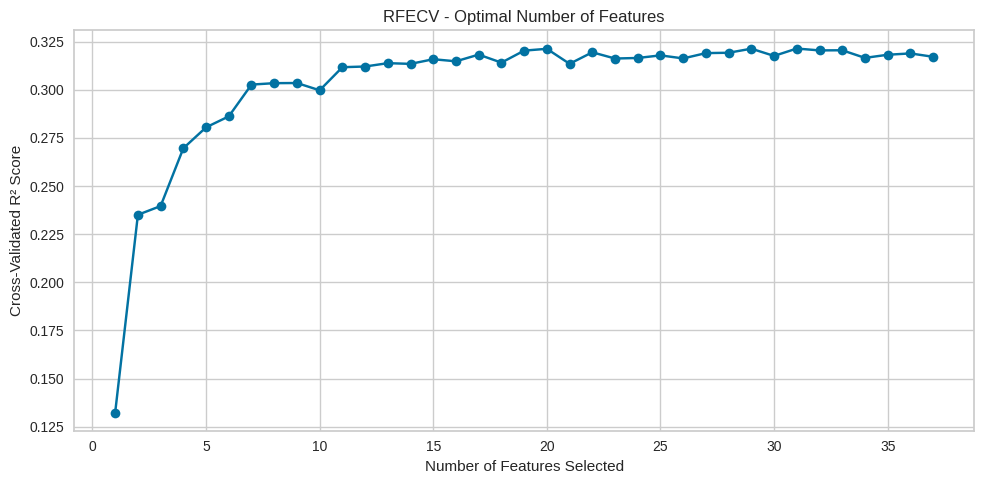

In [22]:
# from sklearn.feature_selection import RFECV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import TimeSeriesSplit
# import matplotlib.pyplot as plt

# # Define features and target
# X = df_clean.reset_index().drop(columns=['SI', 'Timestamp'])  # adjust as needed
# y = df_clean['SI']

# # Use TimeSeriesSplit for time-series-aware CV
# tscv = TimeSeriesSplit(n_splits=5)

# # Define model
# estimator = RandomForestRegressor(n_estimators=100, random_state=42)

# # Run RFECV
# rfecv = RFECV(estimator=estimator, step=1, cv=tscv, scoring='r2', n_jobs=-1)
# rfecv.fit(X, y)

# # Optimal number of features
# print("Optimal number of features:", rfecv.n_features_)
# print("Selected features:", X.columns[rfecv.support_].tolist())

# plt.figure(figsize=(10, 5))
# plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
#          rfecv.cv_results_['mean_test_score'], marker='o')
# plt.title('RFECV - Optimal Number of Features')
# plt.xlabel('Number of Features Selected')
# plt.ylabel('Cross-Validated R² Score')
# plt.grid(True)
# plt.tight_layout()
# plt.show()


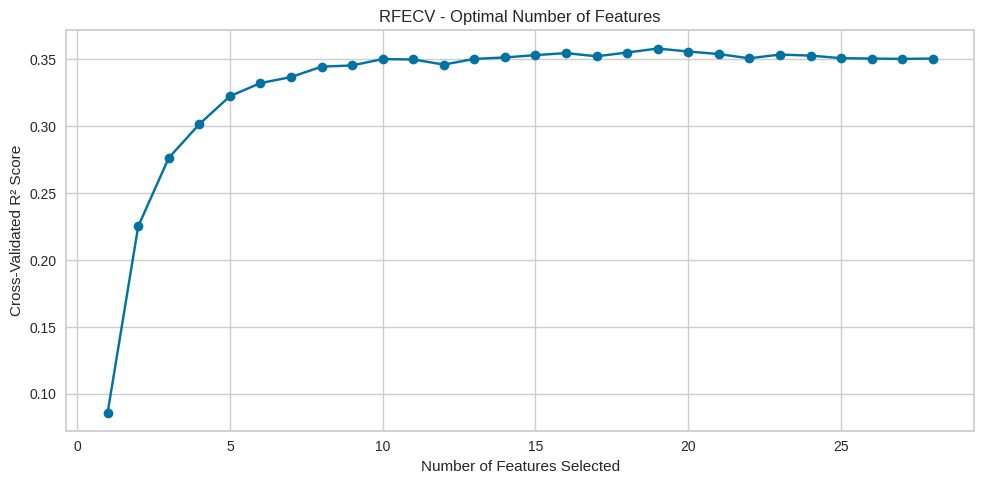

In [38]:
rfecv.n_features_

19

In [50]:
from sklearn.model_selection import train_test_split

# Define test size (e.g., 20% for test)
test_size = int(0.2 * len(df_clean))

X_train = X_scaled[:-test_size]
X_test = X_scaled[-test_size:]
y_train = y[:-test_size]
y_test = y[-test_size:]


In [51]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error

lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM R2 Score:", r2_score(y_test, y_pred_lgbm))
print("LightGBM RMSE:", mean_squared_error(y_test, y_pred_lgbm, squared=False))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000822 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1620, number of used features: 30
[LightGBM] [Info] Start training from score 0.466359
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [52]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge

# Define base models
base_models = [
    ('lgbm', LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)),
    ('ridge', Ridge(alpha=1.0))
]

# Meta model: LightGBM again or Ridge
stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LGBMRegressor(n_estimators=100, learning_rate=0.1),
    passthrough=True
)

# Fit and predict
stacked_model.fit(X_train, y_train)
y_pred_stack = stacked_model.predict(X_test)

print("Stacked Model R2 Score:", r2_score(y_test, y_pred_stack))
print("Stacked Model RMSE:", mean_squared_error(y_test, y_pred_stack, squared=False))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1620, number of used features: 30
[LightGBM] [Info] Start training from score 0.466359
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1296, number of used features: 30
[LightGBM] [Info] Start training from score 0.477553
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1296, number of used features: 30
[LightGBM] [Info] Start traini

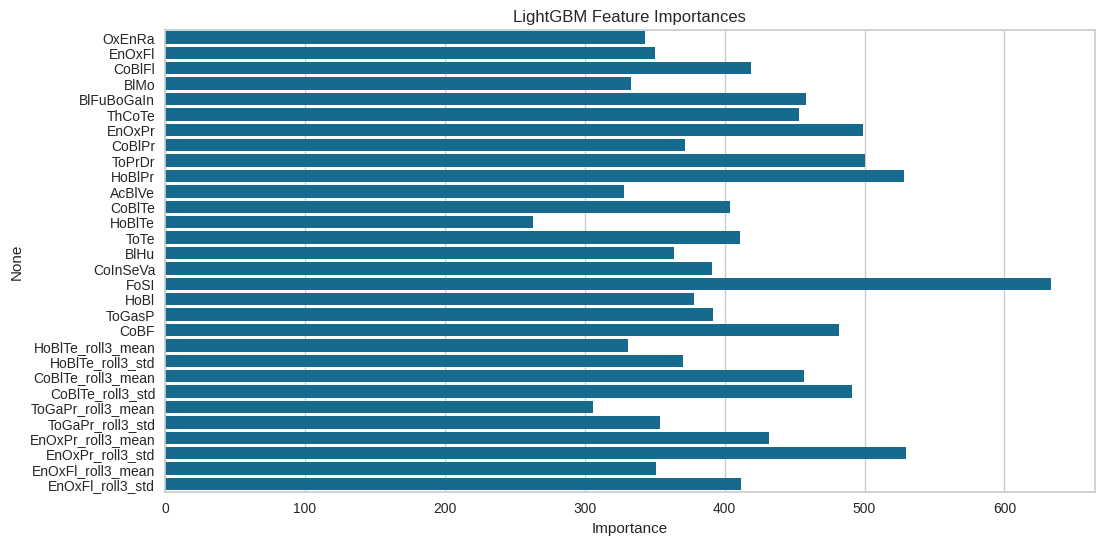

In [40]:
importances = lgbm.feature_importances_
feature_names = X_train.columns

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("LightGBM Feature Importances")
plt.xlabel("Importance")
plt.show()


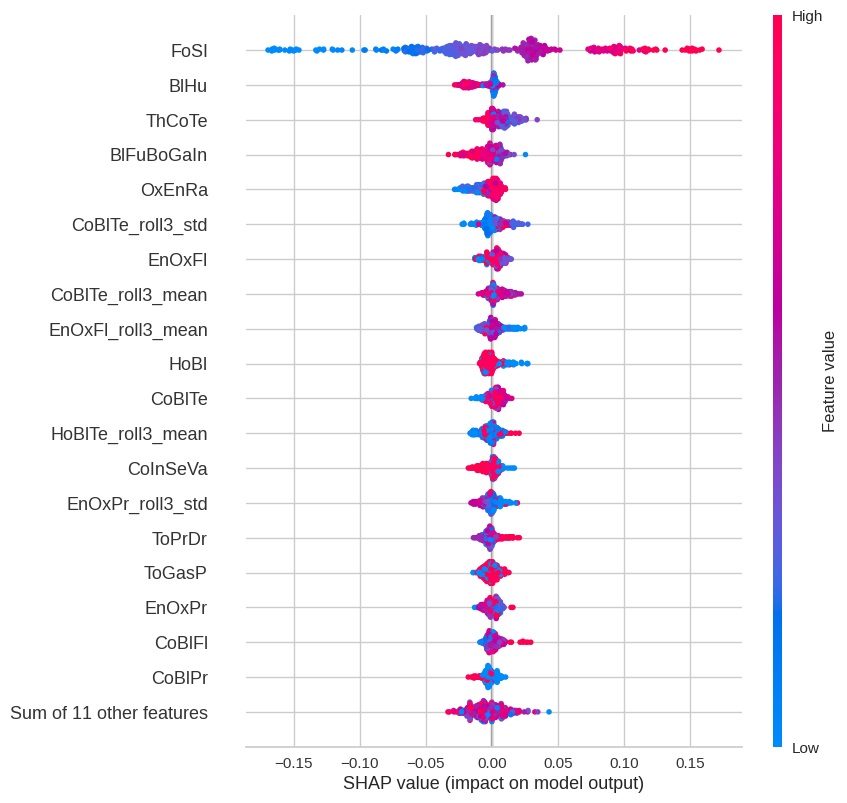

In [54]:
import shap

explainer = shap.Explainer(lgbm)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values, max_display=20)

In [29]:
!pip install pymoo


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 54.5 MB/s eta 0:00:00
  DEPRECATION: Building 'grapheme' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'grapheme'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210136 sha256=a8f767aeb853bec3a903e28868553782956c4a75bae5b90b912503b5b1290369
  Stored in directory: /root/.cache/pip/wheels/ee/3b/0b/1b865800e916d671a24028d884698674138632a83fdfad4926
Successfully built grapheme
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [pymoo]


In [60]:
X_train.columns

Index(['OxEnRa', 'EnOxFl', 'CoBlFl', 'BlMo', 'BlFuBoGaIn', 'ThCoTe', 'EnOxPr',
       'CoBlPr', 'ToPrDr', 'HoBlPr', 'AcBlVe', 'CoBlTe', 'HoBlTe', 'ToTe',
       'BlHu', 'CoInSeVa', 'FoSI', 'HoBl', 'ToGasP', 'CoBF',
       'HoBlTe_roll3_mean', 'HoBlTe_roll3_std', 'CoBlTe_roll3_mean',
       'CoBlTe_roll3_std', 'ToGaPr_roll3_mean', 'ToGaPr_roll3_std',
       'EnOxPr_roll3_mean', 'EnOxPr_roll3_std', 'EnOxFl_roll3_mean',
       'EnOxFl_roll3_std'],
      dtype='object')

In [69]:
from pymoo.core.problem import ElementwiseProblem
import numpy as np

# Feature names that are controllable inputs
control_features = ['Blast_Temperature', 'Top_Pressure', 'Oxygen_Enrichment',
                    'Steam_Flow', 'Blast_Momentum', 'Permeability_Index',
                    'Theoretical_Combustion_Temp']
control_features = ['HoBlTe', 'ToGasP', 'OxEnRa',
                    'EnOxFl', 'BlMo',
                    'ThCoTe']

# Define bounds for each feature based on domain knowledge or data
q1 = X_train[control_features].quantile(0.25)
q3 = X_train[control_features].quantile(0.75)

# Convert to lists
lower_bounds = q1.tolist()
upper_bounds = q3.tolist()
non_cotrol=list(set(X_train.columns.to_list())-set(control_features))
# Assume lgbm_model is your trained LightGBM regressor
class SIOptimization(ElementwiseProblem):
    def __init__(self):
        super().__init__(
            n_var=len(control_features),
            n_obj=1,  # We minimize SI
            n_constr=0,  # Optional: Add constraints if needed
            xl=np.array(lower_bounds),
            xu=np.array(upper_bounds)
        )

    def _evaluate(self, x, out, *args, **kwargs):
        x_dict = dict(zip(control_features, x))
        # Fill in missing features with average/defaults if needed
        x_full = X_train[non_cotrol].mean().to_dict()#df_preproceed.drop(columns=['SI']).mean().to_dict()
        x_full.update(x_dict)

        # Convert to model input format
        input_array = np.array([list(x_full.values())])
        pred_si = stacked_model.predict(input_array)[0]

        out["F"] = [pred_si]
from pymoo.optimize import minimize
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.termination import get_termination

problem = SIOptimization()

algorithm = NSGA2(pop_size=50)
termination = get_termination("n_gen", 100)

res = minimize(problem, algorithm, termination, seed=42, verbose=True)

# Best solution found
print("Optimal SI:", res.F[0])
print("Optimal Parameters:", dict(zip(control_features, res.X)))



n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       50 |      1 |             - |             -
     2 |      100 |      1 |  0.000000E+00 |             f
     3 |      150 |      2 |  0.0021847406 |             f
     4 |      200 |      1 |  0.0058553011 |         ideal
     5 |      250 |      3 |  0.000000E+00 |             f
     6 |      300 |      1 |  0.0015287473 |             f
     7 |      350 |      2 |  0.0015287473 |             f
     8 |      400 |      3 |  0.0015287473 |             f
     9 |      450 |      8 |  0.0015287473 |             f
    10 |      500 |     19 |  0.0015287473 |             f
    11 |      550 |     39 |  0.0015287473 |             f
    12 |      600 |     50 |  0.0015287473 |             f
    13 |      650 |     50 |  0.0015287473 |             f
    14 |      700 |     50 |  0.0015287473 |             f
    15 |      750 |     50 |  0.0015287473 |             f
    16 |      800 |     50 |  0.0015287473 |            

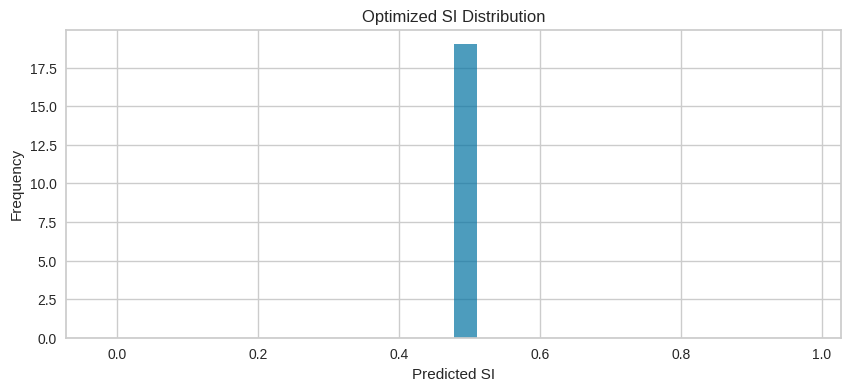

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.hist(res.F, bins=30, alpha=0.7)
plt.xlabel("Predicted SI")
plt.ylabel("Frequency")
plt.title("Optimized SI Distribution")
plt.show()
